# Pandas

https://pandas.pydata.org/docs/user_guide/10min.html

In [82]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Estruturas básicas de dados no *pandas*
### Series

In [ ]:
s = pd.Series([1, 3, 5, np.nan, 6, 8])
s

#### indice temporal

In [ ]:
dates = pd.date_range("2020-01-01", periods=6)
dates

In [ ]:
df = pd.DataFrame(np.random.randn(6, 4), index=dates, columns=list("ABCD"))
df

### Dataframe

Criar um DataFrame passando um dicionário, em que as chaves são as etiquetas das colunas.

In [ ]:
df2 = pd.DataFrame(
    {
        "A": 1.0,
        "B": pd.Timestamp("20130102"),
        "C": pd.Series(1, index=list(range(4)), dtype="float32"),
        "D": np.array([3] * 4, dtype="int32"),
        "E": pd.Categorical(["test", "train", "test", "train"]),
        "F": "foo",
    }
)
df2

### Tipo de dados de um DataFrame

In [ ]:
df2.dtypes

## Ver dados do DataFrame

In [ ]:
df.head(4)

In [ ]:
df.tail(3)

In [ ]:
df.index

In [ ]:
df.columns

Arrays de ``NumPy`` têm o mesmo tipo de dados para todo o array, enquanto os arrays de ``pandas`` podem ter um tipo por coluna.
Ao converter de para ``NumPy`` é escolhido o tipo de dados capaz de "receber" todos os dados.

In [ ]:
df.to_numpy()

### Resumo de estatisticas do Dateframe

In [ ]:
df.describe()

### Transposta

In [ ]:
df.T

### Ordenar por eixo

In [ ]:
df.sort_index(axis=1, ascending=False)

### Ordenar por valores 

In [ ]:
df.sort_values(by="B")

## Escolher itens

Se passarmos a etiqueta de uma das colunas, obtemos a ``serie`` dessa coluna.

In [ ]:
df["A"]

### Slicing

Passando um *slice* obtemos as linhas contidas nessa "fatia".

In [ ]:
df[1:4]

Também podemos passar uma lista com os valores dos indices das linhas 

In [ ]:
df["20130102":"20130104"]

### Escolher pela etiqueta

Escolher todas as linhas com uma certa etiqueta.

In [ ]:
df.loc[dates[0]]

Escolher todas as linhas de certas colunas

In [ ]:
df.loc[:, ["A", "B"]]

Também podemos fazer a seleção por linhas e colunas em simultâneo 

In [ ]:
df.loc["20130102":"20130104", ["A", "B"]]

Escolher um única célula (1 linha e 1 coluna), devolve um escalar

In [ ]:
df.loc[dates[0], "A"]

Existe uma forma mais eficiente de o fazer 

In [ ]:
df.at[dates[0], "A"]

## Escolher pela posição

In [ ]:
df.iloc[3]

In [ ]:
df.iloc[3:5, 0:2]

In [ ]:
df.iloc[[1, 2, 4], [0, 2]]

In [ ]:
df.iloc[1:3, :]

In [ ]:
df.iloc[:, 1:3]

In [ ]:
df.iloc[1, 1]

In [ ]:
df.iat[1, 1]

## Indexação boolena
Ou filtrar por condiçoes

Começamos por filtrar as linhas onde o valor na coluna **A** é superior a 0

In [ ]:
df[df["A"] > 0]

O filtro pode ser em todo o DataFrame

In [ ]:
df[df > 0]

A funçao ``isin()`` também permite filtrar

In [ ]:
df2 = df.copy()
df2["E"] = ["one", "one", "two", "three", "four", "three"]
df2

In [ ]:
df2[df2["E"].isin(["two", "four"])]

## Alterar valores

Criar uma nova coluna, alinha automáticamente pelos indexes

In [ ]:
s1 = pd.Series([1, 2, 3, 4, 5, 6], index=pd.date_range("20130102", periods=6))
s1

Alterar pela etiqueta 

In [ ]:
df.at[dates[0], "A"] = 0

Alterar pela posição

In [ ]:
df.iat[0, 1] = 0

Alterar usando um array *Numpy* 

In [ ]:
df.loc[:, "D"] = np.array([5] * len(df))

In [ ]:
df

Usando uma operaçao ``where``

In [ ]:
df2 = df.copy()
df2[df2 > 0] = -df2
df2

## Tratar dados em falta

In [ ]:
df1 = df.reindex(index=dates[0:4], columns=list(df.columns) + ["E"])
df1.loc[dates[0] : dates[1], "E"] = 1
df1

Excluir linhas com dados em falta

In [ ]:
df1.dropna(how="any")

Preencher dados em falta

In [ ]:
df1.fillna(value=5)

Identificar celulas com valores em falta (``nan``)

In [ ]:
pd.isna(df1)

## Operações

Média dos valores das séries

In [ ]:
df.mean()

Média por linha

In [ ]:
df.mean(axis=1)

Operações sobre ``Series`` ou ``DataFrame`` com indexes ou colunas diferentes, são realizadas sobre o resultado da *união*, alinhando pela união ddos indices ou etiquestas das colunas 

In [ ]:
s = pd.Series([1, 3, 5, np.nan, 6, 8], index=dates).shift(2)
s

In [ ]:
df.sub(s, axis="index")

## Funções do utilizador

In [ ]:
df.agg(lambda x: np.mean(x) * 5.6)

In [ ]:
df.transform(lambda x: x * 101.2)

## Contagem de valores

In [ ]:
s = pd.Series(np.random.randint(0, 7, size=10))
s

In [ ]:
s.value_counts()

## Métodos sobre strings 

In [ ]:
s = pd.Series(["A", "B", "C", "Aaba", "Baca", np.nan, "CABA", "dog", "cat"])

In [ ]:
s.str.upper()

## Dividir e unir

In [ ]:
df = pd.DataFrame(np.random.randn(10, 4))
df

In [ ]:
df1, df2, df3 = [df[:3], df[3:7], df[7:]]

In [ ]:
df1

In [ ]:
df2

In [ ]:
df3

### concat()

In [ ]:
df4 = pd.concat([df3, df2, df1])

In [ ]:
df4

## join

A operaçao ``merge()`` realiza um *join* estilo SQL 

In [ ]:
left = pd.DataFrame({"key": ["foo", "foo"], "lval": [1, 2]})
right = pd.DataFrame({"key": ["foo", "foo"], "rval": [4, 5]})
both = pd.merge(left, right, on="key")

In [ ]:
left

In [ ]:
right

In [ ]:
both

In [ ]:
left = pd.DataFrame({"key": ["foo", "bar"], "lval": [1, 2]})
right = pd.DataFrame({"key": ["foo", "bar"], "rval": [4, 5]})
both = pd.merge(left, right, on="key")

In [ ]:
left

In [ ]:
right

In [ ]:
both

## Agrupar

O processo de agrupar (*"group by"*) envolve os passos:
- **Dividir** os dados em grupos de acordo com um critério 
- **Aplicar** a funçao de forma independente a cada grupo
- **Combinar** os resultado numa estrutura de dados.

In [ ]:
df = pd.DataFrame(
    {
        "A": ["foo", "bar", "foo", "bar", "foo", "bar", "foo", "foo"],
        "B": ["one", "one", "two", "three", "two", "two", "one", "three"],
        "C": np.random.randn(8),
        "D": np.random.randn(8),
    }
)
df

Agrupa pelos valores da coluna **A**, escolhe as colunas **B** e **C** e aplica a funçao ``DataFrameGroupBy.sum()`` aos grupos resultantes. 

In [ ]:
df.groupby("A")[["C", "D"]].sum()

Agrupar por múltiplas colunas cria um ``MultiIndex``

In [ ]:
df.groupby(["A", "B"]).sum()

## Reshaping

### Stack

In [ ]:
arrays = [
   ["bar", "bar", "baz", "baz", "foo", "foo", "qux", "qux"],
   ["one", "two", "one", "two", "one", "two", "one", "two"],
]
index = pd.MultiIndex.from_arrays(arrays, names=["first", "second"])
df = pd.DataFrame(np.random.randn(8, 2), index=index, columns=["A", "B"])


In [ ]:
df

Cria um novo DataFrame com algumas linhas do original. 

In [ ]:
df2 = df[:4]
df2

### Stack

O método ``stack()`` comprime um nível nas colunas do DataFrame

In [ ]:
stacked = df2.stack(future_stack=True)
stacked

É possível realizar a tarefa no sentido contrário com ``unstack()``

In [ ]:
unstacked = stacked.unstack()
unstacked

In [ ]:
unstacked_1 = stacked.unstack(1)
unstacked_1

In [ ]:
unstacked_0 = stacked.unstack(0)
unstacked_0

## Tabelas Pivot


In [ ]:
df = pd.DataFrame(
    {
        "A": ["one", "one", "two", "three"] * 3,
        "B": ["A", "B", "C"] * 4,
        "C": ["foo", "foo", "foo", "bar", "bar", "bar"] * 2,
        "D": np.random.randn(12),
        "E": np.random.randn(12),
    }
)
df

In [ ]:
pd.pivot_table(df, values="D", index=["A", "B"], columns=["C"])

## Série temporal

In [69]:
rng = pd.date_range("1/1/2012", periods=100, freq="s")
ts = pd.Series(np.random.randint(0, 500, len(rng)), index=rng)
ts.resample("5Min").sum()

2012-01-01    24562
Freq: 5min, dtype: int32

Utilizar ``Series.tz_localize()`` permite localizar uma série temporal numa zona especifica.

In [70]:
rng = pd.date_range("3/6/2012 00:00", periods=5, freq="D")
ts = pd.Series(np.random.randn(len(rng)), rng)
ts

2012-03-06   -0.669602
2012-03-07    0.293725
2012-03-08   -0.362240
2012-03-09   -1.396275
2012-03-10    0.472108
Freq: D, dtype: float64

In [71]:
ts_utc = ts.tz_localize("UTC")
ts_utc

2012-03-06 00:00:00+00:00   -0.669602
2012-03-07 00:00:00+00:00    0.293725
2012-03-08 00:00:00+00:00   -0.362240
2012-03-09 00:00:00+00:00   -1.396275
2012-03-10 00:00:00+00:00    0.472108
Freq: D, dtype: float64

Já a funçao ``Series.tz_convert()`` permite mudar a time zone

In [72]:
ts_utc.tz_convert("US/Eastern")

2012-03-05 19:00:00-05:00   -0.669602
2012-03-06 19:00:00-05:00    0.293725
2012-03-07 19:00:00-05:00   -0.362240
2012-03-08 19:00:00-05:00   -1.396275
2012-03-09 19:00:00-05:00    0.472108
Freq: D, dtype: float64

Podemos adicionar tipo de duração temporal *não fixa* usando ``BusinessDay``

In [73]:
rng

DatetimeIndex(['2012-03-06', '2012-03-07', '2012-03-08', '2012-03-09',
               '2012-03-10'],
              dtype='datetime64[ns]', freq='D')

In [74]:
rng + pd.offsets.BusinessDay(5)

DatetimeIndex(['2012-03-13', '2012-03-14', '2012-03-15', '2012-03-16',
               '2012-03-16'],
              dtype='datetime64[ns]', freq=None)

## Categorias (Categorical)

O **pandas** pode incluir dados com categorias num ``DataFrame`` 

In [76]:
df = pd.DataFrame(
    {"id": [1, 2, 3, 4, 5, 6], "raw_grade": ["a", "b", "b", "a", "a", "e"]}
)
df

,id,raw_grade
0,1,a
1,2,b
2,3,b
3,4,a
4,5,a
5,6,e


Converter valores em bruto para categorias 

In [77]:
df["grade"] = df["raw_grade"].astype("category")
df["grade"]

0    a
1    b
2    b
3    a
4    a
5    e
Name: grade, dtype: category
Categories (3, object): ['a', 'b', 'e']

Converter as categorias para nome mais significativos

In [79]:
new_categories = ["very good", "good", "very bad"]
df["grade"] = df["grade"].cat.rename_categories(new_categories)
df

,id,raw_grade,grade
0,1,a,very good
1,2,b,good
2,3,b,good
3,4,a,very good
4,5,a,very good
5,6,e,very bad


Reordenar as categorias e em simultâneo addicionar as categorias em falta.
Métodos que estejam sobre ``Serioes.cat()`` retornam normalmente uma nova ``Series``

In [80]:
df["grade"] = df["grade"].cat.set_categories(
    ["very bad", "bad", "medium", "good", "very good"]
)
df["grade"]

0    very good
1         good
2         good
3    very good
4    very good
5     very bad
Name: grade, dtype: category
Categories (5, object): ['very bad', 'bad', 'medium', 'good', 'very good']

A ordenação é por ordem nas categorias

In [ ]:
df.sort_values(by="grade")

Agrupar por uma coluna de categorias com ``observed=False`` também apresenta as categorias vazias

In [ ]:
df.groupby("grade", observed=False).size()

## Gráficos

O método ``close()`` é utilizado para fechar uma janela de "imagem".
No jupyter, o gráfico é apresentado quando se invoca ``plot()``, noutras situações é necessário utiliar ``show()``.

In [85]:
plt.close("all")

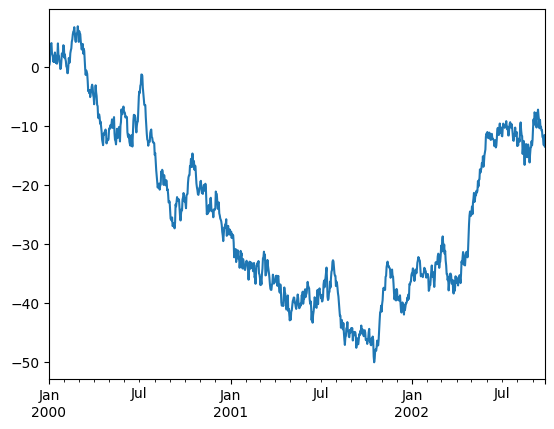

In [84]:
ts = pd.Series(np.random.randn(1000), index=pd.date_range("1/1/2000", periods=1000))
ts = ts.cumsum()
ts.plot();

``plot()`` desenhas todas as colunas:

<Figure size 640x480 with 0 Axes>

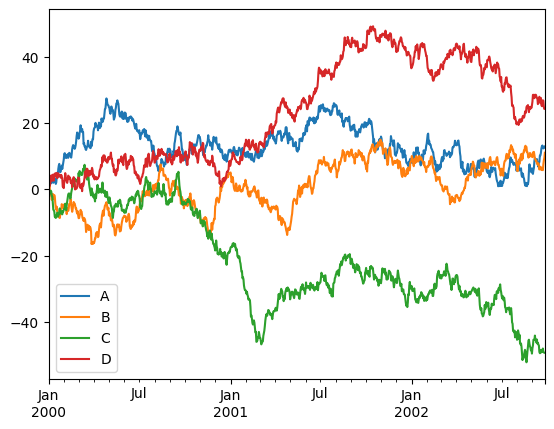

In [90]:
df = pd.DataFrame(
    np.random.randn(1000, 4), index=ts.index, columns=["A", "B", "C", "D"]
)
df = df.cumsum()
plt.figure();
df.plot();
plt.legend(loc='best');

## Importar e exportar dados

### Gravar em CSV 

In [ ]:
f = pd.DataFrame(np.random.randint(0, 5, (10, 5)))
df.to_csv("foo.csv")

### Ler de CSV

In [ ]:
pd.read_csv("foo.csv")

### Escrever para ficheiro *Parquet*

In [ ]:
df.to_parquet("foo.parquet")

### Ler de ficheiro *Parquet* 

In [ ]:
pd.read_parquet("foo.parquet")

### Escrever para Excel

In [ ]:
df.to_excel("foo.xlsx", sheet_name="Sheet1")

### Ler de Excel

In [ ]:
pd.read_excel("foo.xlsx", "Sheet1", index_col=None, na_values=["NA"])